In [16]:
#12/03/2022
#Afternoon session
#LOGISTIC REGRESSION


In [17]:
#Linear..Predict
#Logistic....Classify

In [18]:
import pandas as pd
df=pd.read_csv('creditcard.csv')

In [19]:
df.info()              #target..dependent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
df.shape

(284807, 31)

In [21]:
sum(df.duplicated())

1081

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [24]:
df=df.drop(columns=['Time'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     28

In [26]:
x=df.drop('Class',1)

C:\Users\user\AppData\Local\Temp/ipykernel_12056/123554873.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop('Class',1)


In [27]:
y=df.Class

In [28]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [29]:
y


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [30]:
x=df.iloc[:,df.columns!='Class']

In [31]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [32]:
from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train=train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121580,-0.396288,0.802373,1.615882,1.468026,-0.282496,0.432082,0.417594,0.142096,-0.371056,0.101558,...,0.063783,-0.127556,-0.221129,-0.015357,-0.010349,-0.354040,-0.363688,0.084680,0.116694,49.99
265472,1.909423,-0.368523,-3.150923,-0.603011,2.517304,3.209951,-0.457625,0.818622,0.869339,-0.899841,...,-0.005644,-0.226787,-0.620832,0.180181,0.574431,-0.047635,-0.072892,0.004411,-0.016007,60.00
234990,1.985101,-0.126672,-1.210636,0.291810,-0.091382,-1.057818,0.128493,-0.251356,0.372112,0.172575,...,-0.200500,0.328162,1.037247,-0.016918,0.115915,0.203570,-0.128977,-0.023535,-0.063580,19.95
116860,-1.086874,1.434534,1.089271,-0.323588,-0.324947,-1.355154,0.501191,0.310606,-0.420471,-0.850670,...,-0.137502,-0.154551,-0.614539,0.088566,0.641083,-0.365809,-0.111056,0.053452,0.140030,5.16
125215,-0.949734,0.242471,0.193362,-1.666638,2.359518,3.462452,0.634579,0.865802,-0.726799,-0.888446,...,0.339201,-0.026455,-0.578594,0.000108,0.998362,0.548513,0.293844,-0.068047,0.060057,129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222518,-6.427437,-9.458758,0.789114,-2.030686,6.481861,0.263965,-4.923430,1.772062,-1.367920,0.863236,...,2.765367,0.900271,-0.011278,2.138694,0.596642,0.906597,-0.050666,-0.071007,0.301403,457.95
119166,1.259378,-1.527217,0.566969,-1.412461,-1.774041,-0.260950,-1.241862,0.022472,-1.781417,1.556209,...,-0.094012,0.033342,0.197626,-0.147963,0.001997,0.298144,-0.111503,0.023383,0.032694,125.70
167199,2.149687,-0.615148,-1.792341,-0.663043,-0.075483,-0.869555,0.059361,-0.352590,-0.711351,0.849685,...,-0.569592,-0.335943,-0.312376,0.047117,-0.391574,0.207424,0.117806,-0.041071,-0.076746,24.99
226781,2.015959,0.618374,-2.932867,0.789768,0.832589,-1.948723,0.678057,-0.456906,0.582658,-1.467705,...,-0.149518,-0.077951,-0.074996,-0.070979,-0.397357,0.368792,-0.510852,0.024130,0.016186,28.00


In [34]:
y_test

137407    0
127546    0
49498     0
18208     0
195321    0
         ..
137101    0
233290    0
125082    0
20534     0
18701     0
Name: Class, Length: 226980, dtype: int64

In [35]:
y_train

121580    0
265472    0
234990    0
116860    0
125215    0
         ..
222518    0
119166    0
167199    0
226781    0
183178    0
Name: Class, Length: 56746, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
regression=LogisticRegression()

In [38]:
regression.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
regression.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
y_pred=regression.predict(x_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_test

137407    0
127546    0
49498     0
18208     0
195321    0
         ..
137101    0
233290    0
125082    0
20534     0
18701     0
Name: Class, Length: 226980, dtype: int64

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
print("MSE",mean_squared_error(y_test,y_pred)) 

MSE 0.0007577760155079743


In [45]:
print("R2_score",r2_score(y_test,y_pred))

R2_score 0.5477973803179943


In [46]:
print("MAE",mean_absolute_error(y_test,y_pred)) 

MAE 0.0007577760155079743


In [47]:
regression.score(x_test,y_test)

0.999242223984492

In [48]:
import matplotlib.pyplot as plt

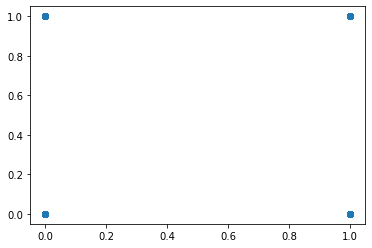

In [49]:
plt.scatter(y_test,y_pred)